# **🧬 Biological EDA Example with Skrub: Cancer Gene Expression**

"Breast Cancer" dataset (from scikit-learn) and simulate additional categorical metadata (like tissue type, sample site, etc.), then use Skrub to clean and prepare it for analysis.

subscribe https://www.youtube.com/@Bioinformatics_Made_Easy



✅ Goal:
Load messy biological metadata

Clean and encode categorical data with Skrub

Explore feature relationships


In [1]:
# Step 1: Install packages
!pip install skrub pandas seaborn matplotlib scikit-learn

# Step 2: Load biological dataset (Breast Cancer)
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Load data
data = load_breast_cancer(as_frame=True)
df = data.frame
df['target'] = data.target

# Simulate biological metadata (messy categorical columns)
np.random.seed(42)
df['sample_origin'] = np.random.choice(['tissue-a', 'Tissue A', 'tissu-a', 'blood', 'serum'], size=len(df))
df['experiment_group'] = np.random.choice(['control', 'treated', None, 'control'], size=len(df))

print(df[['sample_origin', 'experiment_group']].head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.0/340.0 kB 5.0 MB/s eta 0:00:00
  sample_origin experiment_group
0         blood          treated
1         serum             None
2       tissu-a             None
3         serum          treated
4         serum          treated


sample_origin         0
experiment_group    138
dtype: int64


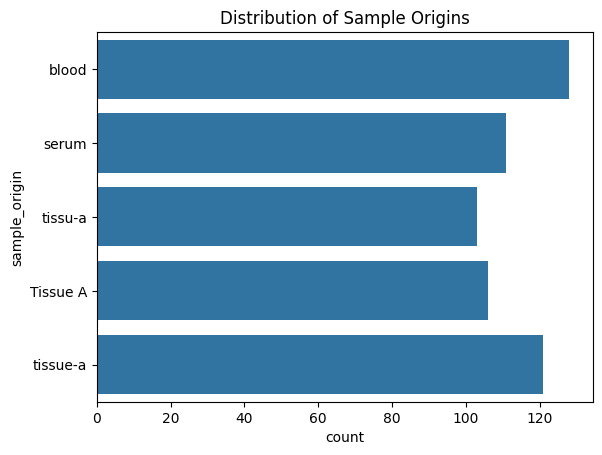

In [2]:
#Step 3: Analyze + Visualize Metadata

# Check missing values
print(df[['sample_origin', 'experiment_group']].isnull().sum())

# Count plot of categories
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y='sample_origin')
plt.title("Distribution of Sample Origins")
plt.show()


In [4]:
#Step 4: Clean with Skrub
from skrub import TableVectorizer

# Clean & encode categorical + numeric data
vec = TableVectorizer()
X = vec.fit_transform(df[['sample_origin', 'experiment_group', 'mean radius', 'mean texture']])

# X is already a DataFrame, no need to convert
cleaned_df = X
print(cleaned_df.head())


   sample_origin_Tissue A  sample_origin_blood  sample_origin_serum  \
0                     0.0                  1.0                  0.0   
1                     0.0                  0.0                  1.0   
2                     0.0                  0.0                  0.0   
3                     0.0                  0.0                  1.0   
4                     0.0                  0.0                  1.0   

   sample_origin_tissu-a  sample_origin_tissue-a  experiment_group_control  \
0                    0.0                     0.0                       0.0   
1                    0.0                     0.0                       0.0   
2                    1.0                     0.0                       0.0   
3                    0.0                     0.0                       0.0   
4                    0.0                     0.0                       0.0   

   experiment_group_treated  experiment_group_nan  mean radius  mean texture  
0                       1

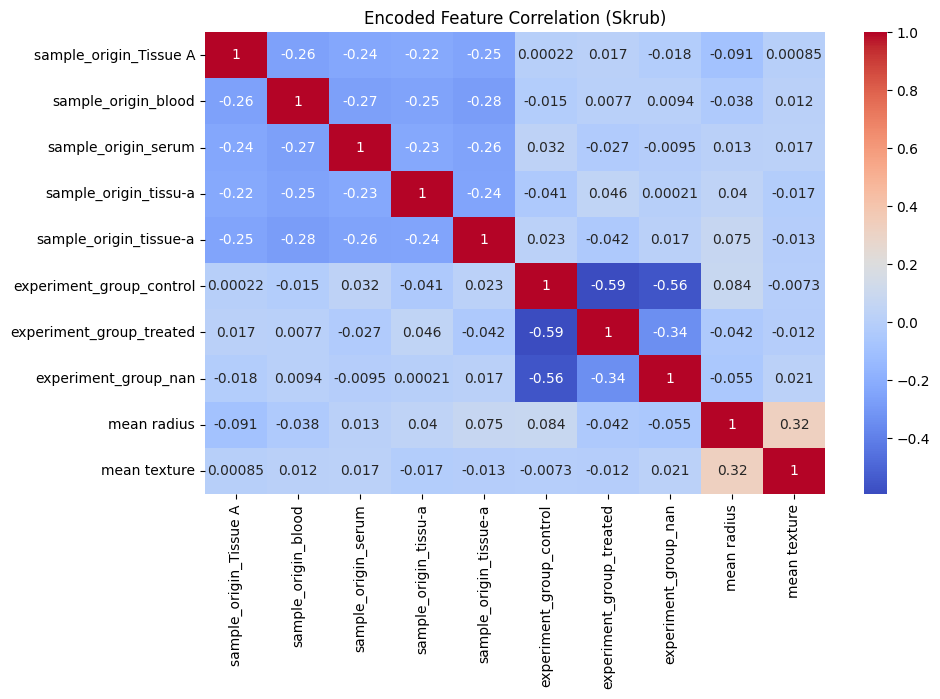

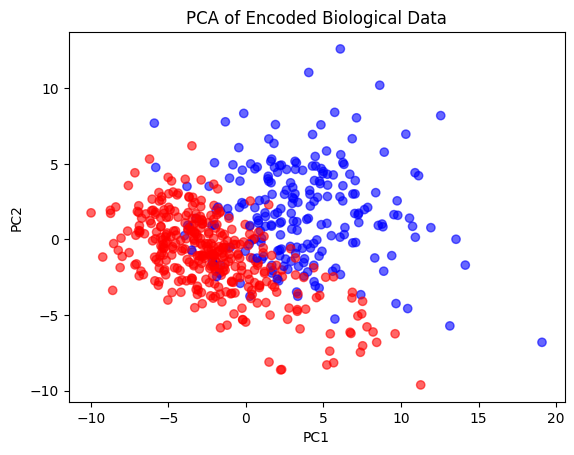

In [5]:
#Step 5: Visual EDA on Encoded Features

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_df.corr(), cmap="coolwarm", annot=True)
plt.title("Encoded Feature Correlation (Skrub)")
plt.show()

# PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(cleaned_df)

plt.scatter(components[:, 0], components[:, 1], c=df['target'], cmap='bwr', alpha=0.6)
plt.title("PCA of Encoded Biological Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



In [7]:
# import skrub
from skrub import TableReport

# open skrub TableReport
TableReport(df)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


✅ What Skrub Did Here:
Cleaned categorical biological labels like sample_origin (which were inconsistent)

Handled missing data in experiment_group

Transformed everything into numeric vectors for ML or further statistical analysis